In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Task1

In [9]:
df = pd.read_csv('lab1_data',delimiter = ',',skiprows=1)

In [10]:
df.head()


,Data Point #,Motor Speed [RPM],Manometer delta P [dpsi],Ambient Temp.[R],Viscosity [slug/ft s],Ambient Press. [psia],Omega Transmitter delta P [dpsi],RakeT1 [psid],RakeT2 [psid],RakeT3 [psid],...,RakeT5 [psid],RakeT6 [psid],RakeT7 [psid],RakeT8 [psid],RakeT9 [psid],RakeS1 [psid],RakeS2 [psid],RakeS3 [psid],RakeS4 [psid],RakeS5 [psid]
0,1.0,400.0,0.005780,540.27,3.856930e-07,14.22862,0.005581,0.004678,0.004670,0.004730,...,0.004747,0.004824,0.004778,0.004714,0.004683,0.000079,0.000135,0.000046,0.000050,0.000007
1,2.0,500.0,0.008671,540.27,3.856930e-07,14.22862,0.008935,0.007642,0.007608,0.007689,...,0.007712,0.007830,0.007671,0.007596,0.007516,0.000131,0.000209,0.000063,0.000091,0.000068
2,3.0,600.0,0.013006,540.27,3.856930e-07,14.22862,0.013304,0.011529,0.011420,0.011549,...,0.011612,0.011724,0.011529,0.011484,0.011376,0.000142,0.000235,0.000072,0.000181,0.000030
3,4.0,700.0,0.018064,540.27,3.856930e-07,14.22862,0.018328,0.016409,0.016146,0.016332,...,0.016460,0.016625,0.016314,0.016307,0.016180,0.000249,0.000370,0.000129,0.000212,0.000097
4,5.0,800.0,0.023844,540.27,3.856930e-07,14.22862,0.023865,0.021370,0.021158,0.021298,...,0.021474,0.021649,0.021264,0.021263,0.021105,0.000304,0.000417,0.000153,0.000225,0.000106


In [11]:
df.columns

Index(['Data Point #', ' Motor Speed [RPM]', ' Manometer delta P [dpsi]',
       ' Ambient Temp.[R]', ' Viscosity [slug/ft s]', ' Ambient Press. [psia]',
       ' Omega Transmitter delta P [dpsi]', ' RakeT1 [psid]', 'RakeT2 [psid]',
       'RakeT3 [psid]', 'RakeT4 [psid]', 'RakeT5 [psid]', 'RakeT6 [psid]',
       'RakeT7 [psid]', 'RakeT8 [psid]', 'RakeT9 [psid]', 'RakeS1 [psid]',
       'RakeS2 [psid]', 'RakeS3 [psid]', 'RakeS4 [psid]', 'RakeS5 [psid]'],
      dtype='object')

In [29]:
df['avg_tot_pressure'] = (df[' RakeT1 [psid]']+df['RakeT2 [psid]']+df['RakeT3 [psid]']+df['RakeT4 [psid]']+df['RakeT5 [psid]']+\
            df['RakeT6 [psid]']+df['RakeT7 [psid]']+df['RakeT8 [psid]']+df['RakeT9 [psid]'])/9

In [30]:
avg_tot_pressure

0     0.004730
1     0.007663
2     0.011533
3     0.016355
4     0.021332
5     0.027001
6     0.034970
7     0.042159
8     0.048591
9     0.058211
10    0.067717
dtype: float64

In [31]:
df['avg_stat_pressure'] = (df['RakeS1 [psid]']+df['RakeS2 [psid]']+df['RakeS3 [psid]']+df['RakeS4 [psid]']+df['RakeS5 [psid]'])/5

In [32]:
avg_stat_pressure

0     0.000063
1     0.000112
2     0.000132
3     0.000212
4     0.000241
5     0.000331
6     0.000326
7     0.000468
8     0.000436
9     0.000494
10    0.000381
dtype: float64

In [33]:
df['q_actual'] = avg_tot_pressure-avg_stat_pressure

In [34]:
q_actual

0     0.004667
1     0.007551
2     0.011401
3     0.016144
4     0.021091
5     0.026670
6     0.034644
7     0.041690
8     0.048155
9     0.057718
10    0.067336
dtype: float64

In [38]:
table = df[['Data Point #',' Motor Speed [RPM]','avg_tot_pressure','avg_stat_pressure','q_actual']]

In [39]:
table

,Data Point #,Motor Speed [RPM],avg_tot_pressure,avg_stat_pressure,q_actual
0,1.0,400.0,0.004730,0.000063,0.004667
1,2.0,500.0,0.007663,0.000112,0.007551
2,3.0,600.0,0.011533,0.000132,0.011401
3,4.0,700.0,0.016355,0.000212,0.016144
4,5.0,800.0,0.021332,0.000241,0.021091
5,6.0,900.0,0.027001,0.000331,0.026670
6,7.0,1000.0,0.034970,0.000326,0.034644
7,8.0,1100.0,0.042159,0.000468,0.041690
8,9.0,1200.0,0.048591,0.000436,0.048155
9,10.0,1300.0,0.058211,0.000494,0.057718


In [47]:
table.to_excel('table.xlsx')

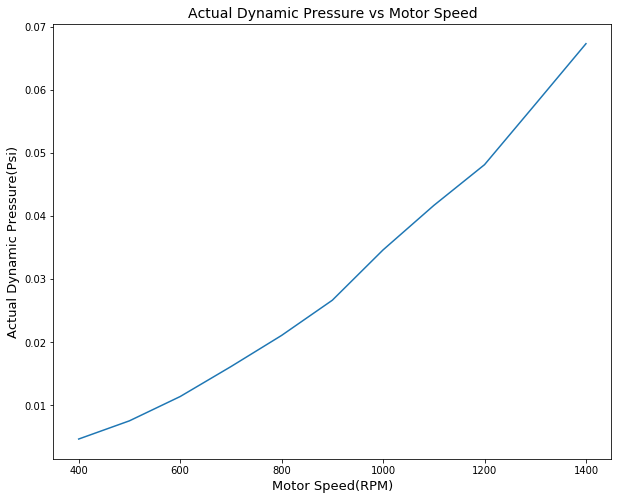

In [57]:
plt.figure(figsize=(10,8));
sns.lineplot(x=' Motor Speed [RPM]',y='q_actual',data=table);
plt.title('Actual Dynamic Pressure vs Motor Speed',fontsize=14)
plt.xlabel('Motor Speed(RPM)',fontsize=13);
plt.ylabel('Actual Dynamic Pressure(Psi)',fontsize=13);
plt.savefig('q_actual vs Motorspeed')

### Task 2

In [58]:
# mass-specific gas constant for air is 1717( ... ) in imperial unit!!!!
#use ideal gas law to calculate the density:
df['density'] = df['avg_stat_pressure']/(1717*df[' Ambient Temp.[R]'])

#use dynamic pressure relation to calculate the actual velocity

df['actual_velocity'] =np.sqrt( 2*df['q_actual']/df['density'] )

In [59]:
#Reynold's number with no length scale:

df['Re'] = df['density']*df['actual_velocity']/df[' Viscosity [slug/ft s]']


In [60]:
#Mach number: Ma = V/a
# a = sqrt(gamma*R*T)
df['sound_speed'] = np.sqrt(1.4*1717*df[' Ambient Temp.[R]'])

df['Mach number'] = df['actual_velocity']/df['sound_speed']


In [61]:
table2= df[['Data Point #', ' Motor Speed [RPM]','q_actual','actual_velocity','Re','Mach number']]

In [62]:
table2

,Data Point #,Motor Speed [RPM],q_actual,actual_velocity,Re,Mach number
0,1.0,400.0,0.004667,11679.165076,2.071954,10.248427
1,2.0,500.0,0.007551,11174.620502,3.504103,9.805691
2,3.0,600.0,0.011401,12646.313702,4.674871,11.097096
3,4.0,700.0,0.016144,11898.199542,7.035672,10.440629
4,5.0,800.0,0.021091,12740.924756,8.584029,11.180117
5,6.0,900.0,0.026670,12224.574080,11.313025,10.727021
6,7.0,1000.0,0.034644,14043.612165,12.792054,12.323221
7,8.0,1100.0,0.041690,12851.649075,16.821561,11.277277
8,9.0,1200.0,0.048155,14313.248347,17.445955,12.559826
9,10.0,1300.0,0.057718,14729.360247,20.319481,12.924963


In [63]:
table2.to_excel('table2.xlsx')

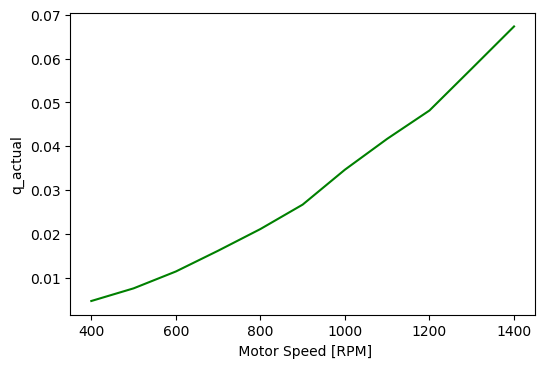

In [75]:
plt.figure(dpi=100)
sns.lineplot(x=' Motor Speed [RPM]',y='q_actual',data=df,color='g');


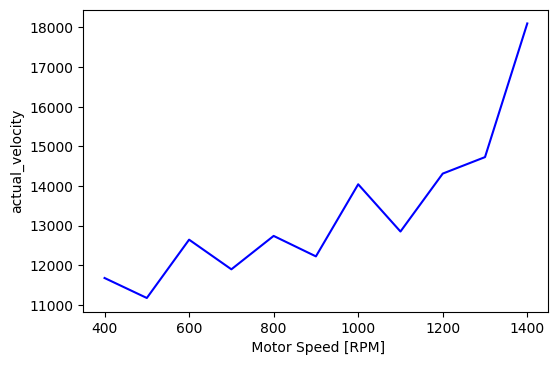

In [76]:
plt.figure(dpi=100)
sns.lineplot(x=' Motor Speed [RPM]',y='actual_velocity',data=df,color='b')

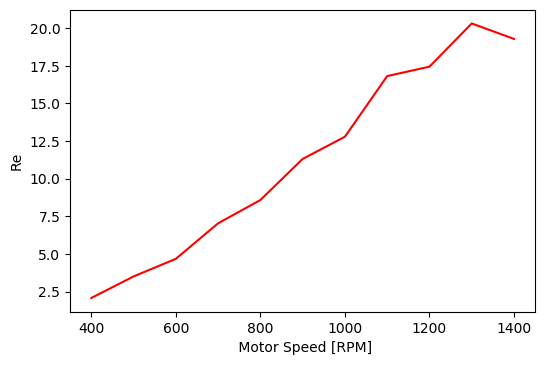

In [77]:
plt.figure(dpi=100)
sns.lineplot(x=' Motor Speed [RPM]',y='Re',data=df,color='r')

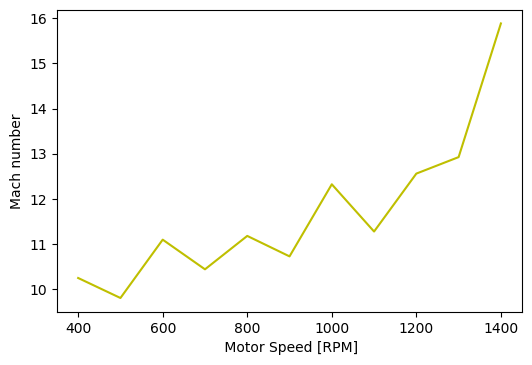

In [78]:
plt.figure(dpi=100)
sns.lineplot(x=' Motor Speed [RPM]',y='Mach number',data=df,color='y')

### Task 3